# Áp dụng gradient descent cho bài toán hồi quy tuyến tính đơn biến
- Dataset: Được tạo ngẫu nhiên bằng thư viện
  - Feature: 1
  - Mẫu: 200 (100 train và 100 test)
  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
X, y = datasets.make_regression(
    n_samples=200,
    n_features=1,
    n_informative=1,
    noise=0,
    random_state=0,
)

# Split source dataset to train and test
x_train, y_train, x_test, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

# Adding column 1 for bias
x_train = np.append(x_train, np.ones(x_train.shape), axis=1)
x_test = np.array([ [xte, 1] for xte in x_test ])

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((100, 2), (100, 1), (100, 2), (100,))

In [3]:
def predict(X, b):
  Y = np.array([])
  for x in X:
    Y = np.append(Y, x.dot(b))
  return Y


def update_coeffs(X, y, b, learning_rate):
  Y_pred = predict(X, b)
  m = len(y)
  b[0] = b[0] - (learning_rate * ((1/m) * np.sum(Y_pred - y)))
  b[1] = b[1] - (learning_rate * ((1/m) * np.sum((Y_pred - y).dot(X)))) 


def gradient_descent(X, y, learning_rate=0.05, epoch=10):
    '''
    Gradient Descent for a single feature
    '''
    # initial parameters
    b = np.array([0.1, 0.1])

    for iter in range(epoch):
      # compute f(x)
      y_predict = predict(X, b)

      # compute cost
      cost = mean_squared_error(y_predict, y)
     
      # check for stop condition
      if cost < 1e-4:
        print(f"Stop at iterator={iter}")
        break
        
      # update parameter
      update_coeffs(X, y, b, learning_rate)
     
    return b

# Tìm đường hồi quy bằng hàm có sẵn để so sánh

In [4]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.coef_

array([[0.1868219, 0.       ]])

# Thực hiện việc train model và vẽ đường hồi quy
- Ở trong hình, đường màu đỏ thể hiện đường hồi quy tìm được bằng hàm có sẵn trong thư viện sklearn
- Đường màu xanh thể hiện đường hồi quy tìm được bằng gradient descent với hàm chi phí là Mean square error, tốc độc học là 1e-5, lặp 500 lần.

[ 0.20999686 -0.14776763]


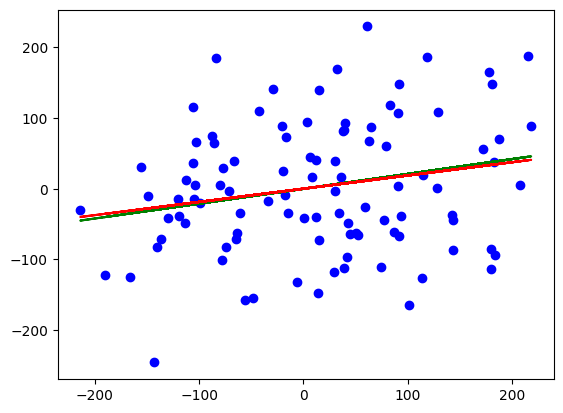

In [5]:
b = gradient_descent(x_train, y_train, learning_rate=0.0001, epoch=300)
print(b)

y_pred = predict(x_test, b)

f = plt.figure('Best line')
plt.scatter(x_test[:, 0], y_test, color='b')

plt.plot(x_test[:, 0], y_pred, color='g')
plt.plot(x_test[:, 0], predict(x_test, *lr.coef_), color='r')

f.show()